# Excercise 1:B 
Using support vector machines to classify the moons dataset and plot the decision boundary with different kernels and values of C
Kernels including linear, polynomial and rbf

In [34]:
#Imports
from sklearn.datasets import make_moons;
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import ListedColormap, colorConverter
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# Colormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [36]:

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


In [37]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

In [38]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)

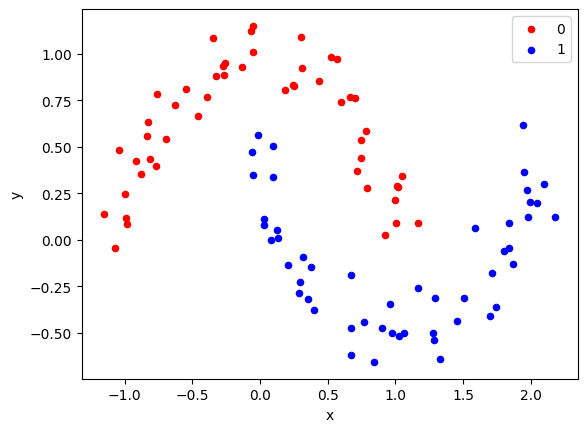

In [39]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
colors = {0: 'red', 1: 'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

pyplot.show()

In [40]:
# split into train and test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [42]:
# Create the model with a linear kernel

In [43]:
svm = SVC(kernel='linear', C=10, gamma=1)
svm.fit(X_test, y_test)

SVC(C=10, gamma=1, kernel='linear')

In [44]:
predictions = svm.predict(X_test)

In [45]:
# Accuracy

In [46]:
acc = accuracy_score(y_test, predictions)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.90


In [47]:
#Plot the decision boundary

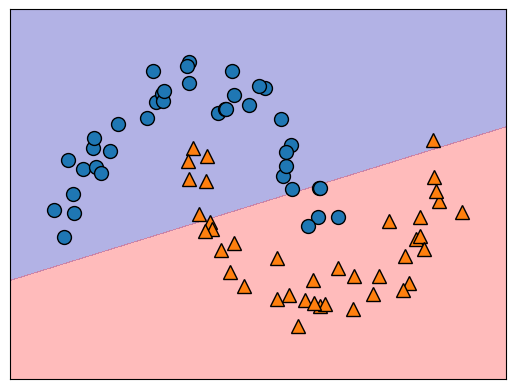

In [48]:
plot_2d_separator(svm, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

pyplot.show()

In [49]:
# Create the model with a polynomial kernel

In [50]:
svmpoly = SVC(kernel='poly', C=10, gamma=1)

In [51]:
svmpoly.fit(X_train, y_train)

SVC(C=10, gamma=1, kernel='poly')

In [52]:
predictions = svmpoly.predict(X_test)

In [53]:
# Accuracy

In [54]:
print(accuracy_score(y_test, predictions))

0.9


In [55]:
#Plot the decision boundary

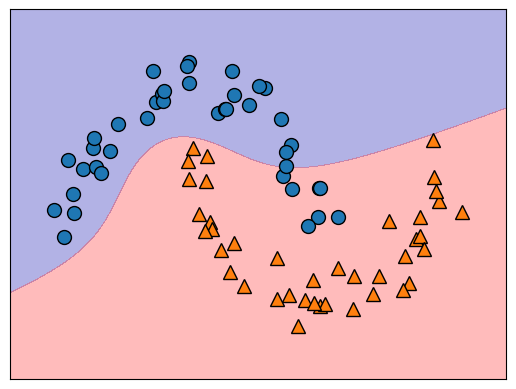

In [56]:
plot_2d_separator(svmpoly, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

pyplot.show()

In [57]:
# Create the model with a rbf kernel

In [58]:
svmrbf = SVC(kernel='rbf', C=10, gamma=1)

In [59]:
svmrbf.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [60]:
predictions = svmrbf.predict(X_test)

In [61]:
# Accuracy

In [62]:
print(accuracy_score(y_test, predictions))

1.0


In [63]:
#Plot the decision boundary

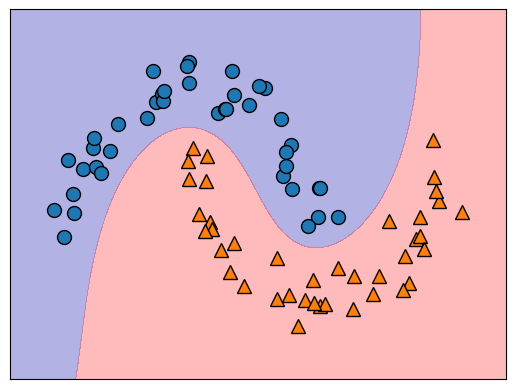

In [64]:
plot_2d_separator(svmrbf, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

pyplot.show()

## Conclusion
Using different kernel tricks to classify the moons dataset, we can see that the linear kernel is not able to classify the dataset properly. The polynomial kernel is able to classify the dataset properly but the rbf kernel is able to classify the dataset with the highest accuracy.